# LINEAR MODEL

#### IMPORTS

In [0]:
%tensorflow_version 2.0
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from tensorflow.keras.datasets import *
import tensorflow as tf
import random
import cv2

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


#### DATASET

In [0]:
# LOAD DATA

def getDataset():
    
    (train_images, train_label), (test_images, test_label) = cifar10.load_data()

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    
    return class_names, train_images, train_label, test_images, test_label

class_names, train_images, train_label, test_images, test_label = getDataset()
print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


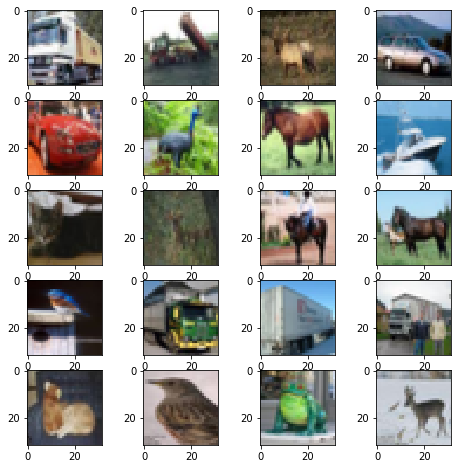

In [0]:
# SHOW SAMPLE

def plotSample(class_names, train_images, train_label):
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):
        img = train_images[i]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

plotSample(class_names, train_images, train_label)

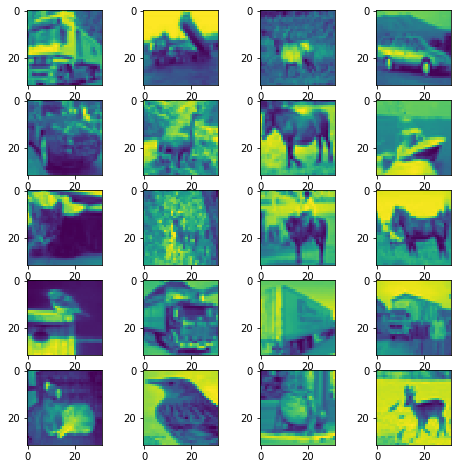

In [0]:
# Gray Scale
def toGrayScale(x_train):
    
    x_gray_train = []
    
    for x in x_train:
        
        x_gray_train.append(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))
    
    return np.array(x_gray_train)

plotSample(class_names, toGrayScale(train_images), train_label)

## LINEAR CLASSIFIER

In [0]:
# format data
class_names, train_images, train_label, test_images, test_label = getDataset()

train_images = train_images.reshape(50000, 3072)
train_images = train_images / 255

test_images = test_images.reshape(10000, 3072)
test_images = test_images / 255

train_label = train_label.astype(int)
test_label = test_label.astype(int)


print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


#### MODEL

In [0]:
# create model
feature_name = "cifar10_features"
features_column = [tf.feature_column.numeric_column(feature_name, shape=[3072])]
# sans optimier # loss = 1.6271913 accuracy = 0.3828
optimizer = optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.1, l1_regularization_strength=0.001) # loss = 1.627169 accuracy = 0.3827 step = 100
#optimizer = optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.01, l1_regularization_strength=0.001) # loss = 13.901432 accuracy = 0.254 step = 100
#optimizer = optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.5, l1_regularization_strength=0.001) # loss = 10.863832 accuracy = 0.2065 step = 100
#optimizer = optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.1, l2_regularization_strength=0.001) # loss = 14.699205 accuracy = 0.2239 step = 100
optimizer = optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.1, l2_shrinkage_regularization_strength=0.001) # loss = 18.9515 accuracy = 0.2085 step = 100
classifier = tf.estimator.LinearClassifier(feature_columns=features_column, n_classes=10, model_dir="linear")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'linear', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### ENTRAINEMENT

In [0]:
def input_fn(x_train, y_train):
    
    def _fn():
        features = {feature_name: tf.constant(x_train)}
        label = tf.constant(y_train)
        return features, label
    return _fn

In [0]:
STEPS = 1000
classifier.train(input_fn=input_fn(train_images, train_label), steps=STEPS)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorf

#### EVALUATION

In [0]:
accuracy_score = classifier.evaluate(input_fn=input_fn(test_images, test_label), steps=STEPS)["accuracy"]
print("Accuracy: ", accuracy_score)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-21T16:05:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from linear/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]


## LINEAR DISCRIMINANT ANALYSIS

#### EVALUATION FUNCTION

In [0]:
def accuracy(model, x_test, y_test):
    correct_values = 0
    i = 0
    
    while i < x_test.shape[0]:
        
        if model.predict(x_test[i].reshape(1, -1)) == y_test[i]:
            correct_values += 1
        i += 1
        
    return correct_values / x_test.shape[0]

In [0]:
def confusionMatrix(model, class_names, x_test, y_test):
    
    x_test_predict = []
    
    for x in x_test:
        x_test_predict.append(model.predict(x.reshape(1, -1)))
    
    x_test_predict = np.array(x_test_predict)
    
    cm = metrics.confusion_matrix(x_test_predict, y_test)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()
    
    for i in range(0, len(class_names)):

        print(i, ": ", class_names[i])

### COLOR

#### DATASET

In [0]:
# Load data
class_names, train_images, train_label, test_images, test_label = getDataset()

# format data
train_images = train_images.reshape(50000, 3072)
train_images = train_images / 255

test_images = test_images.reshape(10000, 3072)
test_images = test_images / 255

train_label = train_label.astype(float)
test_label = test_label.astype(float)


print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

(50000, 3072) (50000, 1) (10000, 3072) (10000, 1)


#### MODEL

In [0]:
ldaColor = LinearDiscriminantAnalysis()
ldaColor.fit(train_images, np.ravel(train_label, order='C'))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

#### EVALUATION

Accuracy on color Dataset ->  0.3713
Confusion matrix for color dataset: 
[[463  65 102  43  61  37  13  50 165  72]
 [ 44 415  37  49  28  40  45  41  81 183]
 [ 51  44 255 122 155 109 101  84  23  25]
 [ 43  51 101 245  82 179 139  72  42  41]
 [ 23  35 133  62 271  80 121  89  11  29]
 [ 41  46  91 214 105 329  89  97  55  32]
 [ 22  38 137 132 146  89 413  46  12  42]
 [ 51  46  71  48  98  68  42 404  21  61]
 [192  80  49  30  25  40  14  42 494  91]
 [ 70 180  24  55  29  29  23  75  96 424]]


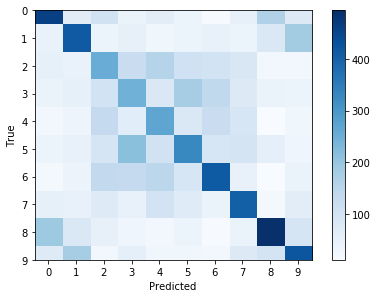

0 :  airplane
1 :  automobile
2 :  bird
3 :  cat
4 :  deer
5 :  dog
6 :  frog
7 :  horse
8 :  ship
9 :  truck


In [0]:
print("Accuracy on color Dataset -> ", accuracy(ldaColor, test_images, test_label))
print("Confusion matrix for color dataset: ")
confusionMatrix(ldaColor, class_names, test_images, test_label)

### GRAYSCALE

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

train_images = toGrayScale(train_images)
test_images = toGrayScale(test_images)

train_images = train_images.reshape(50000, 32 * 32)
test_images = test_images.reshape(10000, 32 * 32)

train_images = train_images / 255
test_images = test_images / 255

#### MODEL

In [0]:
ldaGray = LinearDiscriminantAnalysis()
ldaGray.fit(train_images, np.ravel(train_label, order='C'))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

#### EVALUATION

Accuracy on gray Dataset ->  0.2829
Confusion matrix for gray dataset: 
[[369  57 127  81  76  82  48  53 146  42]
 [ 43 325  39  61  38  41  91  50  95 186]
 [ 78  35 190  95 128 105  93  97  34  29]
 [ 43  45 111 155  90 103 123  59  37  24]
 [ 48  50 129 109 194 100 110 118  14  44]
 [ 63  30  83 163 104 273  95  80  78  23]
 [ 42 111 137 138 166 101 272  83  38  55]
 [ 70  67  88  86 117  82  76 272  56  67]
 [168  93  67  52  45  72  36  95 365 116]
 [ 76 187  29  60  42  41  56  93 137 414]]


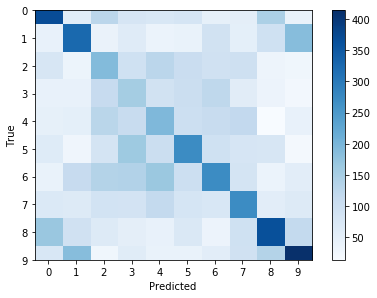

0 :  airplane
1 :  automobile
2 :  bird
3 :  cat
4 :  deer
5 :  dog
6 :  frog
7 :  horse
8 :  ship
9 :  truck


In [0]:
print("Accuracy on gray Dataset -> ", accuracy(ldaGray, test_images, test_label))
print("Confusion matrix for gray dataset: ")
confusionMatrix(ldaGray, class_names, test_images, test_label)